### 1 ResNet 개념 정리

### 1). ResNet 등장 배경
---
- VGG-16은 깊은 신경망 구조로 인하여 기울기 소실 문제 발생
- 잔차연결(Residual Connection), 항등 사상(Identity Mapping), 잔차블록(Residual Block) 등을 통해 기울기 소실 문제 해결
- ResNet은 계층 수에 따라 18, 34, 50, 101, 152의 형태가 있음
- 레즈넷 등장으로 더 깊은 구조의 딥러닝이 등장하기 시작, CV 분야에 가장 효과적이고 널리 사용되는 신경망 구조(EffientNet를 더 많이 사용)

### 2). ResNet의 특징
---
- ResNet의 기본 구조는 1. 입력층, 2. 합성곱 계층, 3. 배치 정규화 계층, 4. 활성화 함수, 5. 잔차 블록, 6. 평균값 플링 7. FC 계층 8. 출력층으로 구성
- ResNet에는 34, 50, 101, 152개로 구성된 네트워크가 있고, 모델은 잔차 블록의 개수에 따라 결정됨.
- ResNet은 2개의 합성곱 계층과 단축 연결로 이루어 짐.
- 단축 연결은 이전 계층의 출력값을 현재 계층의 입력값과 더해 주는 방식으로 구현하여 이전 계층에서 발생한 정보를 다음 계층으로 전달함.

#### 기존 신경망(Plain Network)에서 기술기 소실과 정보 손실
---
- **기존 순방향 신경망(Plain Network)**에서는 이전 계층의 출력이 다음 계층을 거치며 지속적으로 변형되어 전달된다.
- 이 과정에서 원본 정보는 깊은 계층으로 갈수록 직접 전달되지 않고 점차 소실된다.
- 일반적인 합성곱 신경망에서는 계층이 깊어질수록 정보가 변형·압축되며,
- 역전파 과정에서 기울기가 점점 작아지는 기울기 소실(vanishing gradient) 문제가 발생할 수 있다.
- 특히 현재 계층에서 정보 손실이 발생하면 다음 계층에서는 이를 복구하기 어렵다.
  
#### ResNet의 단축 연결
---
- ResNet은 이러한 문제를 해결하기 위해 <B>단축 연결(shortcut connection)</B>을 추가로 도입함.
- 단축 연결은 이전 계층의 출력값을 가공된 출력 F(x)에 직접 더하는 방식으로 구현된다.
- 이를 통해 ResNet에서는 <B>가공된 정보 F(x)와 원본 정보 x</B>가 두 개의 경로를 통해 동시에 다음 계층으로 전달
- 이 구조는 깊은 네트워크에서도 이전 계층의 정보가 유지되도록 돕는다.
- 단축 연결을 통해 전달된 기울기는 일정 수준 이상 유지될 수 있으며, 이로 인해 깊은 모델에서도 기울기 소실 문제가 완화된다.
- 결과적으로 학습 안정성이 향상되고, 모델이 특정 가중치에 수렴하는 속도 또한 빨라진다.
- ResNet의 학습 본질은 완전히 새로운 표현을 학습하는 것이 아니라, <B>입력 x에 대해 얼마나 변화가 필요한지(잔차, residual)</B>를 학습하는 데 있다.

### 3). 기울기 저하 문제[Degradation Problem (성능 저하 문제)]
---
- 깊은 구조로 모델을 설계한다면 더 많은 특징 벡터를 계산할 수 있어, 계층마다 더 세밀한 지역 특징과 전역 특징을 구별할 수 있음.
- 이는 모델의 표현력 향상으로 이어지므로 더 복잡한 문제를 해결할 수 있을 것으로 기대
- 그러나 56개의 계층이 20개 계층보다 오히려 정확도가 낮았음
- 앞의 가정과 반대로 일정 수준 이상으로 계층을 깊게 쌓으면 오히려 학습되지 않는 현상이 기울기 저하문제가 나타남.
- 이 문제는 단순한 기울기 폭주나 기울기 소실 문제가 아니라,
- ReLU, 가중치 초기화, 배치 정규화, 그래디언트 클리핑과 같은 기존의 기울기 안정화 기법으로도 해결할 수 없는 구조적 문제였다.

### 4). 잔차학습
---
#### 항등사상으로 기울기 저하문제 확인
- ResNet은 기울기 저하의 원인을 파악하기 위해 항등사상(Identity Mapping) 실험 진행
- 항등 사상 실험에서 입력을 그대로 출력하는 항등 함수를 구현하는 여러 계층을 쌓아서
- 이론적으로는 최소한 얕은 네트워크만큼의 성능은 보장되어야 하는 함수를 만듦.
- 추가된 계층들이 입력을 그대로 출력하는 항등함수를 학습(가중치 업데이트)하기만 하면 되므로, 이론적으로 얕은 네트워크의 성능을 유지할 수 있을 것으로 예상
- 하지만 입력과 출력을 동일하게 주었음에도 불구하고 기울기저하(성능저하)문제 발생 확인
#### 잔차학습: x는 입력, 모델의 출력 H(x)=F(x)+x, 이라고 하고 출력과 입력의 차이를 잔차(Residual=H(x)−x)라고 하고 잔차를 F(x)=H(x)−x로 정의
- 잔차학습이란 모델이 출력과 입력 차이(Residual=H(x)−x)만 학습(가중치 업데이트)하게 하는 방법
- 기존 인공신경망은 이전 계층에서 활성화된 값을 다음 계층으로 전달. 이 방법은 H(x)값을 최적화하는 방향으로 학습을 진행하지만 계층이 깊어질수록 기술기 저하문제로 H(x)를 최적화하기 어려워짐.
- ResNet은 H(x)를 F(x) + x로 변경함. 이 구조를 빌딩 블록(Building Block)이라고 함
- 이 구조에서 x는 항등사상이므로 이전 계층에서 학습된 결과를 그대로 가져옴. x는 이미 정해진 고정값으로 볼 수 있음.
- 하지만 ResNet은 잔차연결을 통해 입력값 x가 출력값에 더해져 이전 계층에서 학습된 정보다 보존되고 새로운 정보를 추가할 수 있음
- 이를 통해 입력과 출력의 차이를 학습할 수 있으며 학습능력이 향상됨.

### 5). 잔차연결(Residual Connection) = 스킵연결(Skip connection) = 단출연결(Shortcut connection)
- 입력값이 신경망 계층을 통과한 후 출력값에 더해지는 연결, 이를 통해 입력값과 출력값 간의 거리가 줄어드어 학습이 수월해 지고 정보 손실이 줄어듦
- ResNet에서는 잔차 연결은 덧셈 연산으로 만들어 지므로 다음 계층에서 F(x) + x와 같은 결과가 나옴

### 6). 병목 블록: 병목 블록은 3×3 합성곱이 ‘적은 채널’에서만 계산되게 만들어서 연산량을 크게 줄이는 구조
---
- ResNet은 기본적으로 2개의 합성곱 계층이 연결되어 빌딩 블록을 구성함.
- 하지만, 더 깊은 구조로 모델을 구성하면 연산량이 늘어나 학습이 어려움
- ResNet은 깊은 구조를 유지하면서 연산량을 줄이기 위해 병목블록(bottlenet Block)을 추가
- 병목블록은 기존 ResNet 구조와 다르게 1 x 1 합성곱 계층을 통해 입력 특징 맵의 차원 수(C)를 줄이고, => 채널 수가 줄어서 계산을 사게 만듦
- 3 x 3 합성곱 계층을 통해 필터를 적용함 => 핵심 공간 특징을 추출
- 그 후 다시 1 x 1 합성곱 계층을 통해 틀징 맵의 차원 수를 증가 시킴. => 원래 채널 수로 복원해서 skip connection과 더할 수 있게 함.

#### 병목 블록은 1×1 합성곱으로 채널 수를 줄인 뒤 3×3 합성곱을 수행하고, 
#### 다시 1×1 합성곱으로 채널 수를 복원함으로써 깊은 ResNet에서도 연산량을 효율적으로 줄이는 구조

## 2 모델 구현

#### 1). 입력 줄기(input stem)
- ResNet은 1개의 입력 줄기와 4개의 Stage로 구성
- 입력 줄기 = 네트워크의 입구, 원본 이미지를 처음으로 처리하는 부분
 - [입력이미지(3 X 224 x 224)] -> [7 x 7 conv, stride=2, paddin=3] -> [ BatchNorm ] -> [ ReLU ] -> [3 x 3 MaxPoll, stride = 2, Padding=1]
 - 논문에서 output-size: 합성곱 출력 공식 [N + 2P - K]/2 + 1 = [입력크기 + 2* 패딩 - 커널크기)] / 2 + 1
  - - 입력 224 x 224, 7 x 7 comv, stride2, padding 3 [224 + 2 x 3 - 7] / 2 + 1 = 112
    - Conv1 커널 크기(kernel size) = 7×7 → K = 7
- 입력 줄기에서 Conv1을 통과한 feature map의 공간 해상도는 112×112가 되며,
- 이후 3×3 MaxPool(stride=2)을 거쳐 공간 해상도는 56×56으로 감소한다. 이때 feature map의 채널 수는 64
- 즉 입력 줄기(stem)를 통과한 feature map의 크기는 64 × 56 × 56
 ---
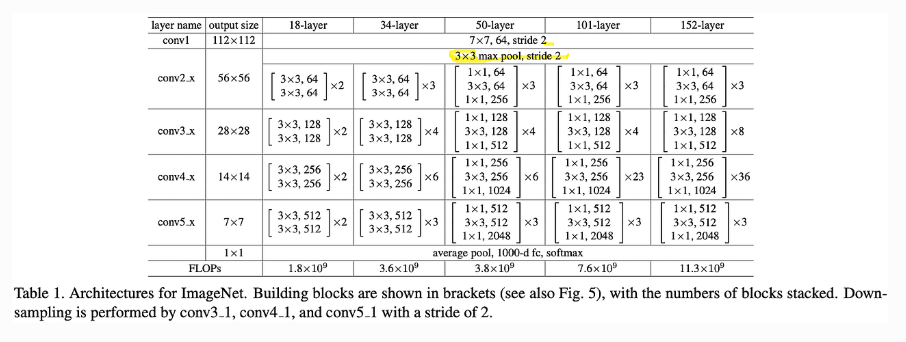

---
#### 2). Stage: ResNet에서 stage는 동일한 채널 수(planes)와 해상도를 유지하는 잔차 블록들의 묶음
- Block: 실제 연산 단위 (BasicBlock / BottleneckBlock)
- Stage: 같은 형태의 block을 여러 개 반복한 구간
- 입력 줄기(stem)를 통과한 feature map의 크기는 64 × 56 × 56 에서 Stage 1의 입력
- 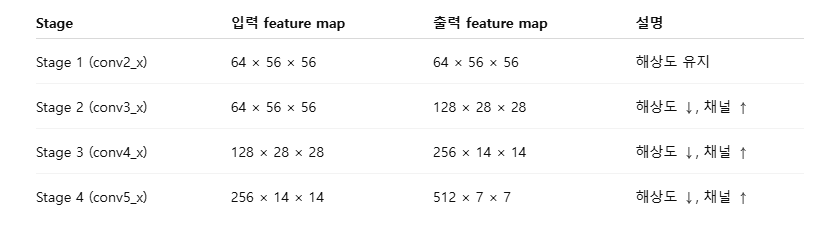

#### Stage 규칙
---
- 🔹 Stage 1 (conv2_x) 예외적인 stage
- 입력: 64 × 56 × 56
- 모든 block: stride = 1, 해상도 유지, 채널 수 유지 (64), shortcut = identity
- 🔹 Stage 2 ~ Stage 4 (conv3_x ~ conv5_x)
- 규칙 1: Stage의 첫 번째 block: stride = 2, 공간 해상도 ↓ (절반), 채널 수 ↑, shortcut에 1×1 Conv 필요
 - 규칙 2: Stage의 나머지 block들: tride = 1, 공간 해상도 유지, 채널 수 유지, shortcut = identity
 - 구조 변화는 항상 “stage의 첫 block”에서만 발생
 - 🔁 왜 이렇게 설계됐나 (핵심 이유)
 - 해상도 감소 + 채널 증가는 한 번만 일어나야 함
 - 모든 block에서 stride=2를 쓰면: 정보 손실 과도, residual 연결 의미 붕괴
 - 그래서: stage 경계에서만 구조 변화, 나머지는 안정적인 잔차 학습

In [1]:
# 기본 잔차 블록
from torch import nn


class BasicBlock(nn.Module):
    expansion = 1
    # expansion은 잔차 블록의 출력 채널 수가 입력 대비 몇 배로 확장되는지를 나타내는 계수

    def __init__(self, inplanes, planes, stride=1):
        super().__init__()
        ## 1 첫번째 합성곱
        # self.layer1 = self._make_layer(BasicBlock, planes=64, ...)
        self.conv1 = nn.Conv2d(
            inplanes, planes, # 입력, 출력
            kernel_size=3, stride=stride, padding=1, bias=False
        )
        # 배치 정규화
        self.bn1 = nn.BatchNorm2d(planes)
        # 활성화 함수
        self.relu = nn.ReLU(inplace=True)

        ## 2 두번째 합성곱
        # self.layer2 = self._make_layer(BasicBlock, planes=128, ...)
        self.conv2 = nn.Conv2d(
            planes, planes, # 출력을 입력으로 받음, 출력
            kernel_size=3, stride=1, padding=1, bias=False
        )
        # 배치 정규화
        self.bn2 = nn.BatchNorm2d(planes)

        # 단축연결
        self.shortcut = nn.Sequential()
        if stride != 1 or inplanes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    inplanes, self.expansion*planes,
                    kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = self.conv1(x) # 1번 합성곱
        out = self.bn1(out) # 배치정규화
        out = self.relu(out) # 활성화 함수
        out = self.conv2(out) # 2번 합성곱
        out = self.bn2(out) # 배치 정규화
        out += self.shortcut(x) ### 단축연결
        out = self.relu(out) # 활성화 함수
        return out

In [3]:
class BottleneckBlock(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1):
        super().__init__()
        # 1번 컨볼루션
        self.conv1 = nn.Conv2d(
            inplanes, planes,
            kernel_size=1, bias=False
        )
        # 배치정규화
        self.bn1 = nn.BatchNorm2d(planes)
        # 2번 컨벌루션
        self.conv2 = nn.Conv2d(
            planes, planes,
            kernel_size=3, stride=stride, padding=1, bias=False
        )
        # 2번 배치정규화
        self.bn2 = nn.BatchNorm2d(planes)
        # 3번 컨설루션
        self.conv3 = nn.Conv2d(
            planes, self.expansion*planes,
            kernel_size=1, bias=False
        )
        # 3번 배치정규화
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)
        # 활성화 함수
        self.relu = nn.ReLU(inplace=True)

        # 쇼컷
        self.shortcut = nn.Sequential() # 아무 레이어도 없는 Sequential() 즉, shortcut(x) = x
        
        # stride != 1 => 다운 샘플링이 발생해서, 메인 경로에서 공간 해상도를 줄이는 경우
        # inplanes != self.expansion * planes => 입력 채널 수 ≠ 출력 채널 수
        if stride != 1 or inplanes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    inplanes, self.expansion*planes,
                    kernel_size=1, stride=stride, bias=False
                ),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = self.conv1(x) # C 1
        out = self.bn1(out) # B 1
        out = self.relu(out) # 활
        out = self.conv2(out) # C2
        out = self.bn2(out) # B 2
        out = self.relu(out) # 활
        out = self.conv3(out) # C 3
        out = self.bn3(out) # 배
        out += self.shortcut(x) # 쇼컷
        out = self.relu(out) # 활
        return out

In [5]:
import torch

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super().__init__()

        self.inplanes = 64  # 현재 feature map의 채널 수
        '''
        # 입력줄기
        self.stem = nn.Sequential(
            Conv(3 → 64, 7×7, stride=2),
            BatchNorm,
            ReLU,
            MaxPool(3×3, stride=2)
        )
        결과
        입력: 3 × 224 × 224
        출력: 64 × 56 × 56 (112/2)
        '''
        self.stem = nn.Sequential(
            nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(self.inplanes),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        ) 
        # Stage 정의
        self.stage1 = self._make_layer(block, 64, layers[0], stride=1) # 출력채널 64, stride 1, 해상도 유지(56x56)
        self.stage2 = self._make_layer(block, 128, layers[1], stride=2) # 출력채널 128, stride 2, 해상도 ↓
        self.stage3 = self._make_layer(block, 256, layers[2], stride=2) # 출력채널 256, stride 2, 해상도 ↓
        self.stage4 = self._make_layer(block, 512, layers[3], stride=2) # 출력채널 512, stride 2, 해상도 ↓

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes) 
        # 마지막 stage의 feature map을 클래스 개수만큼의 점수(logit)로 바꾸는 분류기
        # stage4의 출력 채널 수는 항상 512가 “기본” 이지만 ResNet-50 / 101 / 152 에서는 Bottleneck으로 expansion = 4 이므로 2048

    # stage를 만드는 핵심 함수: 한 stage를 구성하는 block 묶음을 만듦
    def _make_layer(self, block, planes, num_blocks, stride):
        layers = []
        layers.append(block(self.inplanes, planes, stride))
        self.inplanes = planes * block.expansion
        for _ in range(num_blocks - 1):
            layers.append(block(self.inplanes, planes, 1))
        
        return nn.Sequential(*layers) # 언패킹 layers[0], layers[1], layers[2], ...

    def forward(self, x):
        out = self.stem(x)
        out = self.stage1(out)
        out = self.stage2(out)
        out = self.stage3(out)
        out = self.stage4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

In [7]:
from torchvision import models
from torchinfo import summary


resnet18 = ResNet(BasicBlock, [2, 2, 2, 2], 1000) #  → ResNet-18
resnet34 = ResNet(BasicBlock, [3, 4, 6, 3], 1000) # → ResNet-34
resnet50 = ResNet(BottleneckBlock, [3, 4, 6, 3], 1000) # → ResNet-50
resnet101 = ResNet(BottleneckBlock, [3, 4, 23, 3], 1000) # → ResNet-101
resnet152 = ResNet(BottleneckBlock, [3, 8, 36, 3], 1000) # → ResNet-152

torch_model = models.resnet34(weights="ResNet34_Weights.IMAGENET1K_V1")

resnet34_info = summary(resnet34, (1, 3, 224, 224), verbose=0)
torch_model_info = summary(torch_model, (1, 3, 224, 224), verbose=0)

print(resnet34_info.total_params)
print(torch_model_info.total_params)

21797672
21797672


In [8]:
resnet50_tv = models.resnet50(
    weights=models.ResNet50_Weights.IMAGENET1K_V1
)

resnet101_tv = models.resnet101(
    weights=models.ResNet101_Weights.IMAGENET1K_V1
)

resnet152_tv = models.resnet152(
    weights=models.ResNet152_Weights.IMAGENET1K_V1
)

# summary
info_50 = summary(resnet50_tv,  (1, 3, 224, 224), verbose=0)
info_101 = summary(resnet101_tv, (1, 3, 224, 224), verbose=0)
info_152 = summary(resnet152_tv, (1, 3, 224, 224), verbose=0)

print("ResNet50 :", info_50.total_params)
print("ResNet101:", info_101.total_params)
print("ResNet152:", info_152.total_params)

ResNet50 : 25557032
ResNet101: 44549160
ResNet152: 60192808
